In [1]:
from Descriptive import Descriptive
import warnings
warnings.filterwarnings("ignore")

In [2]:
obj=Descriptive()

In [3]:
import pandas as pd
from nsepy import get_history as gh
import datetime as dt
stk_data = pd.read_csv("Tatacoffee13_21.csv")
stk_data['Date'] = pd.to_datetime(stk_data['Date'])
# Filter data for the specified date range
start_date = dt.datetime(2021, 9, 1)
end_date = dt.datetime(2022, 2, 4)
filtered_data = stk_data[(stk_data['Date'] >= start_date) & (stk_data['Date'] <= end_date)]


In [4]:
filtered_data

,Date,Open,High,Low,Close
2144,2021-09-01,214.00,214.25,207.90,211.10
2145,2021-09-02,211.90,213.75,208.70,209.50
2146,2021-09-03,210.00,211.25,206.40,207.60
2147,2021-09-06,207.60,209.50,203.20,204.10
2148,2021-09-07,211.35,217.00,209.60,212.45
...,...,...,...,...,...
2220,2021-12-22,202.90,207.80,201.35,205.00
2221,2021-12-23,206.00,206.85,202.05,202.95
2222,2021-12-24,203.90,203.90,199.35,201.00
2223,2021-12-27,200.00,222.00,196.00,218.35


In [5]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 2144 to 2224
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    81 non-null     datetime64[ns]
 1   Open    81 non-null     float64       
 2   High    81 non-null     float64       
 3   Low     81 non-null     float64       
 4   Close   81 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.8 KB


In [6]:
low=filtered_data["Low"]

In [7]:
dataset=filtered_data
quan,qual=obj.segreQuanQual(dataset)

The Quantitative Data: ['Date', 'Open', 'High', 'Low', 'Close']
The Qualtitative Data []


In [8]:
import pandas as pd

class Descriptive:

    def descriptive_Analysis(self, dataset, quantative):
        des_data = pd.DataFrame(index=["Null_count", "NonNull_count", "Total_Count", "Mean", "Median", "Mode", "Std", "Min", "Q1:25%", "Q2:50%", "Q3:75%", "Q4:100%", "IQR", "1.5Rule",
                                       "Lesser", "Greater"], columns=quantative)

        for i in quantative:
            des_data[i]["Null_count"] = dataset[i].isnull().sum()
            des_data[i]["NonNull_count"] = dataset[i].count()
            des_data[i]["Total_Count"] = len(dataset[i])
            des_data[i]["Mean"] = dataset[i].mean()
            des_data[i]["Median"] = dataset[i].median()
            des_data[i]["Mode"] = dataset[i].mode()[0]
            des_data[i]["Std"] = dataset[i].std()  
            des_data[i]["Min"] = dataset[i].min()
            des_data[i]["Q1:25%"] = dataset[i].quantile(0.25)
            des_data[i]["Q2:50%"] = dataset[i].quantile(0.50)
            des_data[i]["Q3:75%"] = dataset[i].quantile(0.75)
            des_data[i]["Q4:100%"] = dataset[i].max()
            des_data[i]["IQR"] = des_data[i]["Q3:75%"] - des_data[i]["Q1:25%"]
            des_data[i]["1.5Rule"] = 1.5 * des_data[i]["IQR"]
            des_data[i]["Lesser"] = des_data[i]["Q1:25%"] - des_data[i]["1.5Rule"]
            des_data[i]["Greater"] = des_data[i]["Q3:75%"] + des_data[i]["1.5Rule"]

        return des_data


In [9]:
descriptive_instance = Descriptive()
des_data= descriptive_instance.descriptive_Analysis(dataset, quan)

In [11]:
des_data

,Date,Open,High,Low,Close
Null_count,0,0,0,0,0
NonNull_count,81,81,81,81,81
Total_Count,81,81,81,81,81
Mean,2021-10-30 06:31:06.666666752,213.412963,216.725926,209.511728,212.390741
Median,2021-10-29 00:00:00,213.0,214.7,207.95,212.3
Mode,2021-09-01 00:00:00,213.0,204.05,196.0,202.2
Std,34 days 20:47:17.705248027,9.322311,10.148024,8.614513,8.827872
Min,2021-09-01 00:00:00,196.0,200.0,190.3,194.55
Q1:25%,2021-09-30 00:00:00,206.0,208.9,203.4,205.35
Q2:50%,2021-10-29 00:00:00,213.0,214.7,207.95,212.3


In [12]:
des_data["Low"]

Null_count                0
NonNull_count            81
Total_Count              81
Mean             209.511728
Median               207.95
Mode                  196.0
Std                8.614513
Min                   190.3
Q1:25%                203.4
Q2:50%               207.95
Q3:75%                214.5
Q4:100%              231.25
IQR                    11.1
1.5Rule               16.65
Lesser               186.75
Greater              231.15
Name: Low, dtype: object

In [13]:
des_data["High"]

Null_count                0
NonNull_count            81
Total_Count              81
Mean             216.725926
Median                214.7
Mode                 204.05
Std               10.148024
Min                   200.0
Q1:25%                208.9
Q2:50%                214.7
Q3:75%                221.5
Q4:100%               254.4
IQR                    12.6
1.5Rule                18.9
Lesser                190.0
Greater               240.4
Name: High, dtype: object

In [14]:
import numpy as np

In [15]:
np.percentile(dataset["Low"],99)

np.float64(230.45)

In [16]:
np.percentile(dataset["High"],80)

np.float64(223.5)

In [17]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob
    

Mean=209.512, Standard Deviation=8.615
The area between range(230,235):0.008275201139887481


np.float64(0.008275201139887481)

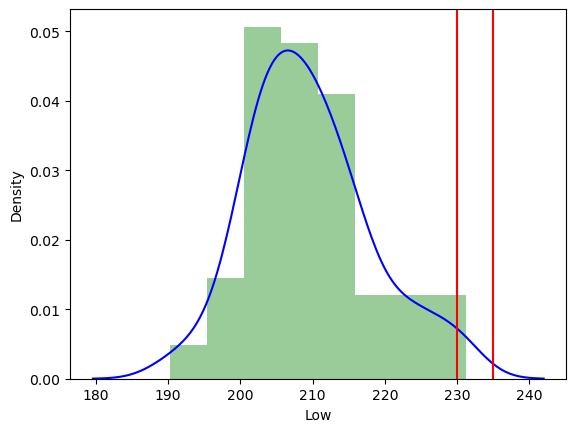

In [27]:
get_pdf_probability(dataset["Low"],230,235)

In [28]:
def stdNBgraph(dataset):
        # Coverted to standard Normal Distribution
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()

    values=[i for i in dataset]

    z_score=[((j-mean)/std) for j in values]

    sns.distplot(z_score,kde=True)

    sum(z_score)/len(z_score)
    #z_score.std()


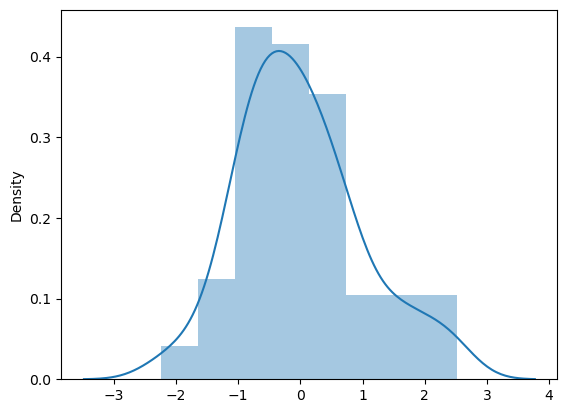

In [29]:
stdNBgraph(dataset["Low"])

In [30]:
def freqTable(columnName,dataset):
    import pandas as pd
    frq=pd.DataFrame()
    frq["Unique_Values"]=dataset[columnName].value_counts().index
    frq["Frequency"]=dataset[columnName].value_counts().values
    frq["Relative_Fre"]=dataset[columnName].value_counts().values/len(dataset[columnName])*100
    frq["Cumulative"]=frq["Relative_Fre"].cumsum()
    return frq

In [31]:
freqTable("Low",dataset)

,Unique_Values,Frequency,Relative_Fre,Cumulative
0,207.15,2,2.469136,2.469136
1,203.05,2,2.469136,4.938272
2,196.00,2,2.469136,7.407407
3,204.10,2,2.469136,9.876543
4,208.70,1,1.234568,11.111111
...,...,...,...,...
72,190.30,1,1.234568,95.061728
73,201.35,1,1.234568,96.296296
74,202.05,1,1.234568,97.530864
75,199.35,1,1.234568,98.765432


In [32]:
freqTable("High",dataset)

,Unique_Values,Frequency,Relative_Fre,Cumulative
0,209.50,2,2.469136,2.469136
1,214.70,2,2.469136,4.938272
2,207.80,2,2.469136,7.407407
3,204.05,2,2.469136,9.876543
4,214.25,1,1.234568,11.111111
...,...,...,...,...
72,200.00,1,1.234568,95.061728
73,206.85,1,1.234568,96.296296
74,203.90,1,1.234568,97.530864
75,222.00,1,1.234568,98.765432


In [33]:
fh=freqTable("High",dataset)

In [34]:
fh.sort_values(by="Frequency",ascending=False)

,Unique_Values,Frequency,Relative_Fre,Cumulative
0,209.50,2,2.469136,2.469136
1,214.70,2,2.469136,4.938272
2,207.80,2,2.469136,7.407407
3,204.05,2,2.469136,9.876543
4,214.25,1,1.234568,11.111111
...,...,...,...,...
72,200.00,1,1.234568,95.061728
73,206.85,1,1.234568,96.296296
74,203.90,1,1.234568,97.530864
75,222.00,1,1.234568,98.765432


In [35]:
fhs=fh[fh["Frequency"]==2]["Unique_Values"].sort_values(ascending=False)

In [36]:
fhs

1    214.70
0    209.50
2    207.80
3    204.05
Name: Unique_Values, dtype: float64